# Data Exploration - Amazon Beauty Ratings

This notebook explores the Amazon Beauty Products ratings dataset to understand:
- Data structure and quality
- Rating distributions and patterns
- User behavior characteristics
- Product popularity trends
- Temporal patterns
- Statistical insights for recommendation system design


## 1. Setup and Data Loading


In [ ]:
import sys
import os
from datetime import datetime

sys.path.insert(0, os.path.abspath('../src'))

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from data_loader import load_csv_numpy, validate_data, get_basic_stats

np.random.seed(42)
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['figure.dpi'] = 100


In [2]:
data, header = load_csv_numpy('../data/raw/ratings_Beauty.csv')
print(f"Data shape: {data.shape}")
print(f"Columns: {header}")


Data shape: (2023070,)
Columns: ['UserId', 'ProductId', 'Rating', 'Timestamp']


## 2. Data Overview and Quality Check


In [3]:
stats = get_basic_stats(data)
print(f"Total rows: {stats['total_rows']:,}")
print(f"Total columns: {stats['total_columns']}")
print(f"Memory usage: {stats['memory_mb']:.2f} MB")
print(f"\nUnique counts:")
for col, count in stats['unique_counts'].items():
    print(f"  {col}: {count:,}")


Total rows: 2,023,070
Total columns: 4
Memory usage: 262.39 MB

Unique counts:
  UserId: 1,210,271
  ProductId: 249,274
  Rating: 5
  Timestamp: 4,231


In [4]:
validation = validate_data(data)
print(f"Total nulls: {validation['total_nulls']}")
print(f"Null percentage: {validation['null_percentage']:.2f}%")
print(f"\nNull counts by column:")
for col, count in validation['null_counts'].items():
    print(f"  {col}: {count}")


Total nulls: 0
Null percentage: 0.00%

Null counts by column:
  UserId: 0
  ProductId: 0
  Rating: 0
  Timestamp: 0


## 3. Rating Distribution Analysis


In [5]:
ratings = data['Rating']
unique_ratings, counts = np.unique(ratings, return_counts=True)

print("Rating distribution:")
for rating, count in zip(unique_ratings, counts):
    percentage = (count / len(ratings)) * 100
    print(f"  {rating:.1f} stars: {count:,} ({percentage:.2f}%)")

print(f"\nRating statistics:")
print(f"  Mean: {np.mean(ratings):.4f}")
print(f"  Median: {np.median(ratings):.4f}")
print(f"  Std: {np.std(ratings):.4f}")
print(f"  Min: {np.min(ratings):.1f}")
print(f"  Max: {np.max(ratings):.1f}")


Rating distribution:
  1.0 stars: 183,784 (9.08%)
  2.0 stars: 113,034 (5.59%)
  3.0 stars: 169,791 (8.39%)
  4.0 stars: 307,740 (15.21%)
  5.0 stars: 1,248,721 (61.72%)

Rating statistics:
  Mean: 4.1490
  Median: 5.0000
  Std: 1.3115
  Min: 1.0
  Max: 5.0


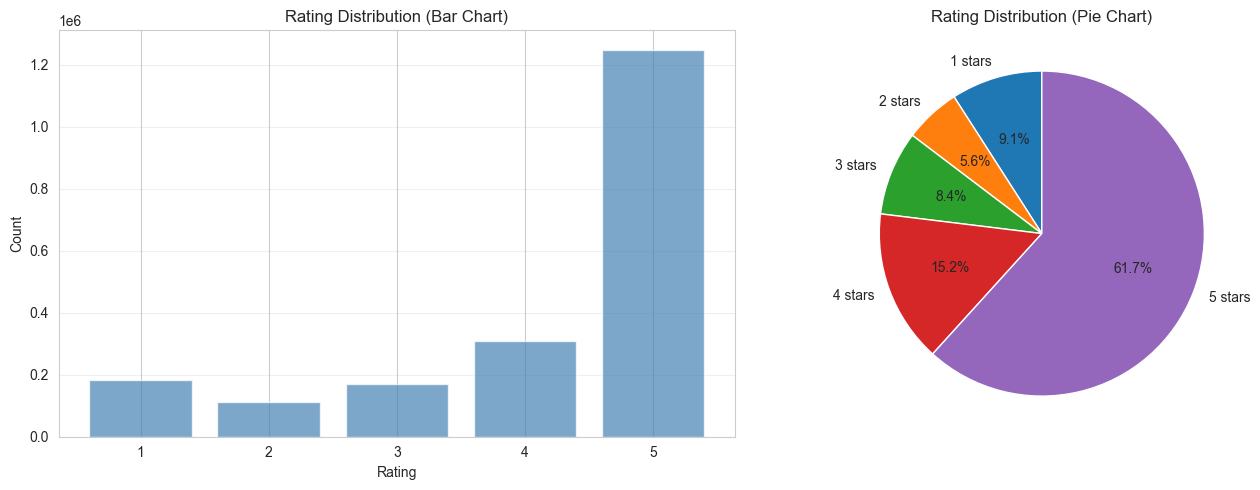

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

ax1.bar(unique_ratings, counts, color='steelblue', alpha=0.7)
ax1.set_xlabel('Rating')
ax1.set_ylabel('Count')
ax1.set_title('Rating Distribution (Bar Chart)')
ax1.set_xticks([1, 2, 3, 4, 5])
ax1.grid(axis='y', alpha=0.3)

ax2.pie(counts, labels=[f"{r:.0f} stars" for r in unique_ratings], autopct='%1.1f%%', startangle=90)
ax2.set_title('Rating Distribution (Pie Chart)')

plt.tight_layout()
plt.show()


# Data Exploration - Amazon Beauty Products Recommendation System

**Dataset**: Amazon Ratings (Beauty Products)  
**Size**: 2,023,070 ratings  
**Objective**: Explore data characteristics, patterns, and prepare for recommendation system

## Contents
1. Load data using NumPy
2. Basic statistics and data quality
3. Rating distribution analysis
4. User and product analysis
5. Temporal patterns
6. Data sparsity investigation


ImportError: cannot import name 'load_csv_numpy' from 'data_processing' (c:\Users\admin\Downloads\Lab2DS\notebooks\../src\data_processing.py)

## 1. Load Data with NumPy Only

We use `np.genfromtxt()` to load CSV data without Pandas.


In [ ]:
data_path = '../data/raw/ratings_Beauty.csv'

print("Loading data with NumPy...")
data = np.genfromtxt(
    data_path,
    delimiter=',',
    skip_header=1,
    dtype=None,
    encoding='utf-8',
    names=['UserId', 'ProductId', 'Rating', 'Timestamp']
)

print(f"Data loaded successfully!")
print(f"Total records: {len(data):,}")
print(f"Data shape: {data.shape}")
print(f"Data type: {data.dtype}")
print("\nFirst 5 records:")
print(data[:5])


Loading data with NumPy...
Data loaded successfully!
Total records: 2,023,070
Data shape: (2023070,)
Data type: [('UserId', '<U21'), ('ProductId', '<U10'), ('Rating', '<f8'), ('Timestamp', '<i4')]

First 5 records:
[('A39HTATAQ9V7YF', '0205616461', 5., 1369699200)
 ('A3JM6GV9MNOF9X', '0558925278', 3., 1355443200)
 ('A1Z513UWSAAO0F', '0558925278', 5., 1404691200)
 ('A1WMRR494NWEWV', '0733001998', 4., 1382572800)
 ('A3IAAVS479H7M7', '0737104473', 1., 1274227200)]


## 2. Data Quality Check

Check for missing values and data validity using NumPy operations.


In [ ]:
ratings = data['Rating']
timestamps = data['Timestamp']

print("=== Data Quality Analysis ===\n")

print(f"Missing values in Rating: {np.sum(np.isnan(ratings))}")
print(f"Rating range: [{np.min(ratings):.1f}, {np.max(ratings):.1f}]")
print(f"Rating mean: {np.mean(ratings):.3f}")
print(f"Rating std: {np.std(ratings):.3f}")
print(f"Rating median: {np.median(ratings):.1f}")

print(f"\nUnique users: {len(np.unique(data['UserId'])):,}")
print(f"Unique products: {len(np.unique(data['ProductId'])):,}")
print(f"Unique ratings: {np.unique(ratings)}")

print("\n=== Rating Value Counts ===")
unique_ratings, counts = np.unique(ratings, return_counts=True)
for rating, count in zip(unique_ratings, counts):
    percentage = (count / len(ratings)) * 100
    print(f"Rating {rating:.1f}: {count:,} ({percentage:.2f}%)")


=== Data Quality Analysis ===

Missing values in Rating: 0
Rating range: [1.0, 5.0]
Rating mean: 4.149
Rating std: 1.312
Rating median: 5.0

Unique users: 1,210,271
Unique products: 249,274
Unique ratings: [1. 2. 3. 4. 5.]

=== Rating Value Counts ===
Rating 1.0: 183,784 (9.08%)
Rating 2.0: 113,034 (5.59%)
Rating 3.0: 169,791 (8.39%)
Rating 4.0: 307,740 (15.21%)
Rating 5.0: 1,248,721 (61.72%)


## 3. Rating Distribution Visualization


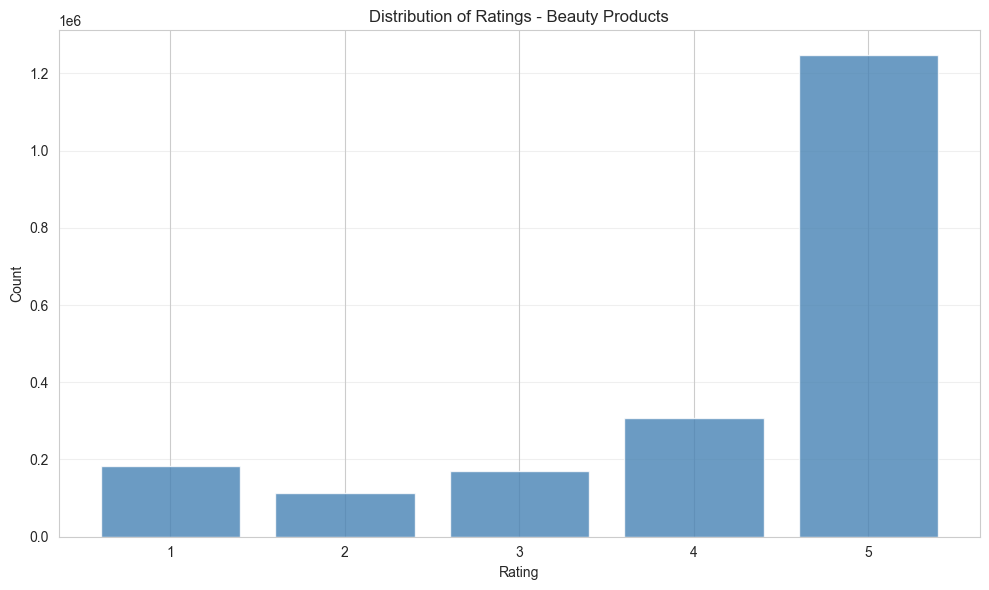


Key Observation:
- Ratings are highly skewed towards 5 stars
- Positive bias in user feedback
- This is typical for e-commerce platforms


In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
unique_ratings, counts = np.unique(ratings, return_counts=True)
ax.bar(unique_ratings, counts, color='steelblue', alpha=0.7, edgecolor='black')
ax.set_xlabel('Rating')
ax.set_ylabel('Count')
ax.set_title('Distribution of Ratings - Beauty Products')
ax.set_xticks([1, 2, 3, 4, 5])
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("\nKey Observation:")
print("- Ratings are highly skewed towards 5 stars")
print("- Positive bias in user feedback")
print("- This is typical for e-commerce platforms")


## 4. Product Popularity Analysis

Identify most popular products based on number of ratings.


=== Top 20 Most Rated Products ===

 1. Product B001MA0QY2: 7,533 ratings
 2. Product B0009V1YR8: 2,869 ratings
 3. Product B0043OYFKU: 2,477 ratings
 4. Product B0000YUXI0: 2,143 ratings
 5. Product B003V265QW: 2,088 ratings
 6. Product B000ZMBSPE: 2,041 ratings
 7. Product B003BQ6QXK: 1,918 ratings
 8. Product B004OHQR1Q: 1,885 ratings
 9. Product B00121UVU0: 1,838 ratings
10. Product B000FS05VG: 1,589 ratings
11. Product B000142FVW: 1,558 ratings
12. Product B0046VGPHQ: 1,475 ratings
13. Product B001JKTTVQ: 1,468 ratings
14. Product B004INUWX0: 1,430 ratings
15. Product B000TKH6G2: 1,379 ratings
16. Product B00150LT40: 1,349 ratings
17. Product B0048O2R1E: 1,349 ratings
18. Product B003S516XO: 1,347 ratings
19. Product B00188IFHS: 1,341 ratings
20. Product B0056GDG90: 1,333 ratings


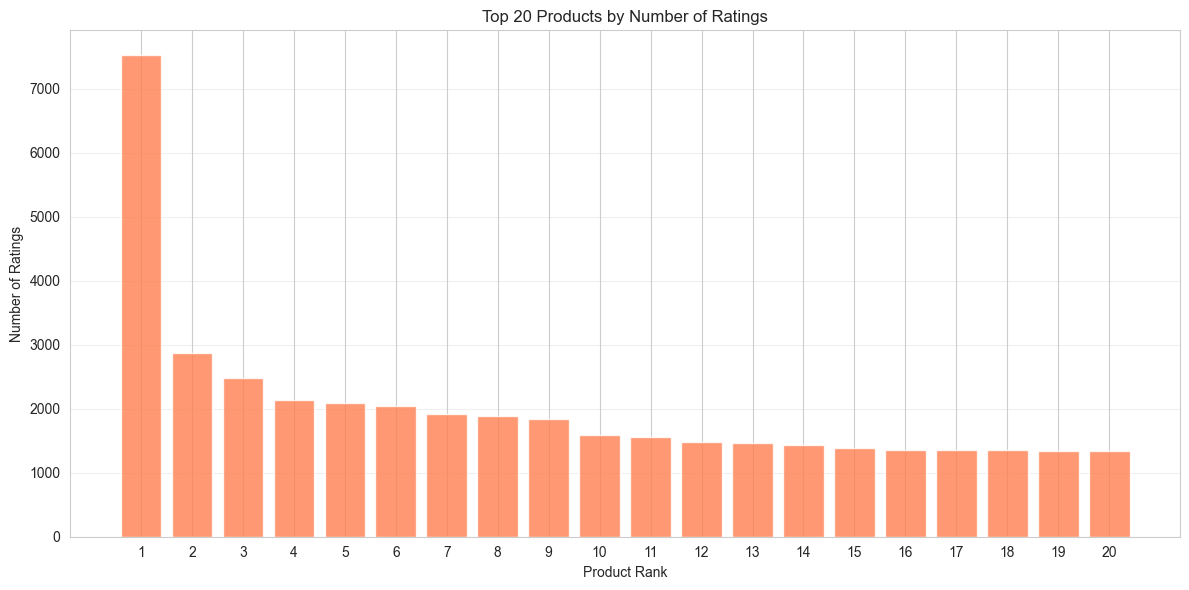


Product rating statistics:
- Average ratings per product: 8.12
- Median ratings per product: 2
- Max ratings for a product: 7,533
- Products with only 1 rating: 103,484


In [ ]:
product_ids = data['ProductId']
unique_products, product_counts = np.unique(product_ids, return_counts=True)

sorted_idx = np.argsort(product_counts)[::-1]
top_20_products = unique_products[sorted_idx[:20]]
top_20_counts = product_counts[sorted_idx[:20]]

print("=== Top 20 Most Rated Products ===\n")
for i, (prod_id, count) in enumerate(zip(top_20_products, top_20_counts), 1):
    print(f"{i:2d}. Product {prod_id}: {count:,} ratings")

fig, ax = plt.subplots(figsize=(12, 6))
ax.barh(range(20), top_20_counts[::-1], color='coral', alpha=0.7, edgecolor='black')
ax.set_yticks(range(20))
ax.set_yticklabels([f"Product {pid}" for pid in top_20_products[::-1]])
ax.set_xlabel('Number of Ratings')
ax.set_title('Top 20 Products by Number of Ratings')
ax.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\nProduct rating statistics:")
print(f"- Average ratings per product: {np.mean(product_counts):.2f}")
print(f"- Median ratings per product: {np.median(product_counts):.0f}")
print(f"- Max ratings for a product: {np.max(product_counts):,}")
print(f"- Products with only 1 rating: {np.sum(product_counts == 1):,}")


## 5. User Activity Analysis

Analyze user behavior and engagement patterns.


=== User Activity Analysis ===

Total unique users: 1,210,271
Average ratings per user: 1.67
Median ratings per user: 1
Max ratings by a user: 389
Min ratings by a user: 1

User rating count percentiles:
  25th percentile: 1 ratings
  50th percentile: 1 ratings
  75th percentile: 2 ratings
  90th percentile: 3 ratings
  95th percentile: 4 ratings
  99th percentile: 10 ratings

User segments:
- Power users (≥10 ratings): 12,595 (1.0%)
- Casual users (<5 ratings): 1,157,897 (95.7%)


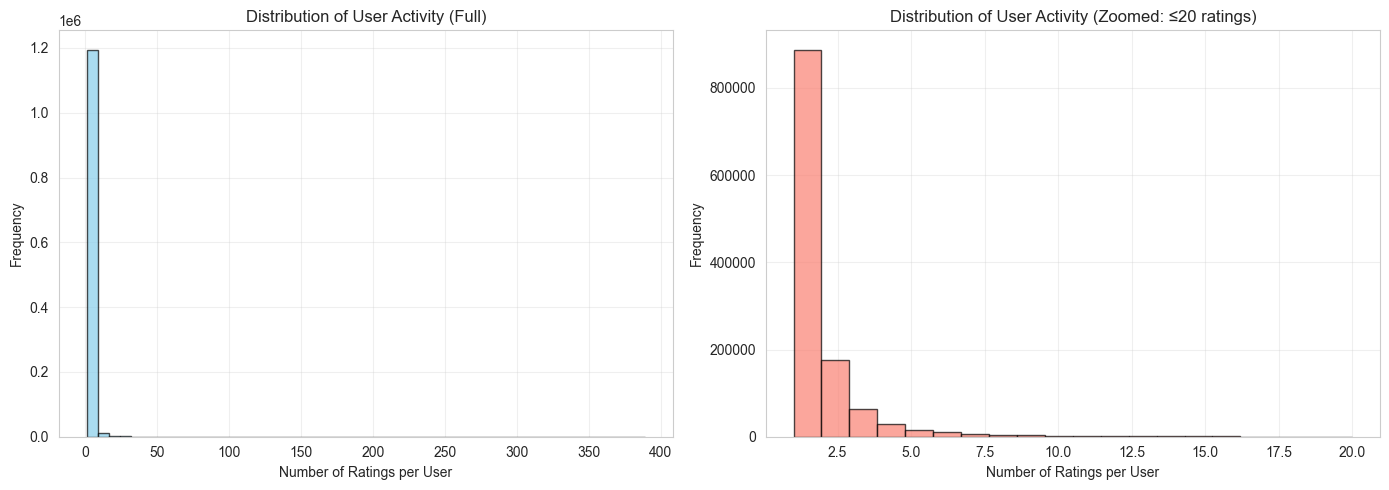

In [ ]:
user_ids = data['UserId']
unique_users, user_counts = np.unique(user_ids, return_counts=True)

print("=== User Activity Analysis ===\n")
print(f"Total unique users: {len(unique_users):,}")
print(f"Average ratings per user: {np.mean(user_counts):.2f}")
print(f"Median ratings per user: {np.median(user_counts):.0f}")
print(f"Max ratings by a user: {np.max(user_counts):,}")
print(f"Min ratings by a user: {np.min(user_counts):,}")

percentiles = [25, 50, 75, 90, 95, 99]
print("\nUser rating count percentiles:")
for p in percentiles:
    val = np.percentile(user_counts, p)
    print(f"  {p}th percentile: {val:.0f} ratings")

power_users = np.sum(user_counts >= 10)
casual_users = np.sum(user_counts < 5)
print(f"\nUser segments:")
print(f"- Power users (≥10 ratings): {power_users:,} ({power_users/len(unique_users)*100:.1f}%)")
print(f"- Casual users (<5 ratings): {casual_users:,} ({casual_users/len(unique_users)*100:.1f}%)")

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].hist(user_counts, bins=50, color='skyblue', edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Number of Ratings per User')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of User Activity (Full)')
axes[0].grid(alpha=0.3)

axes[1].hist(user_counts[user_counts <= 20], bins=20, color='salmon', edgecolor='black', alpha=0.7)
axes[1].set_xlabel('Number of Ratings per User')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of User Activity (Zoomed: ≤20 ratings)')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()


## 6. Temporal Analysis

Explore temporal patterns in the dataset using timestamps.


=== Temporal Analysis ===

Date range: 1998-10-19 to 2014-07-23
Time span: 15.8 years


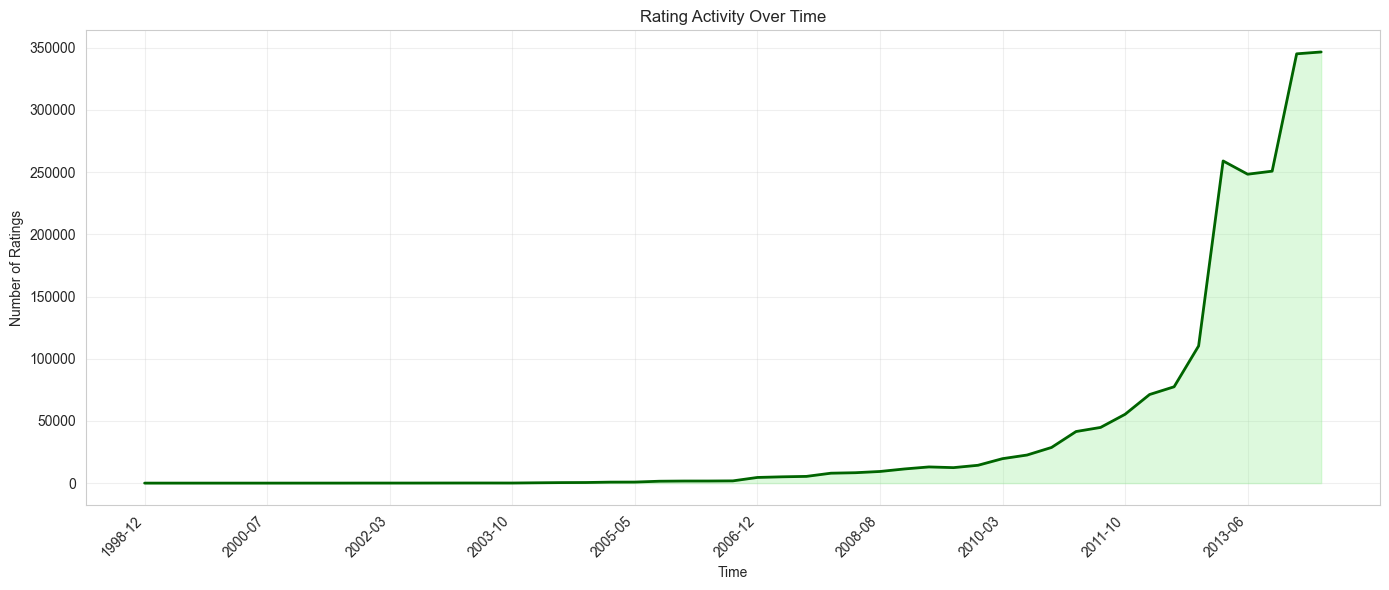


Temporal insights:
- Activity patterns show engagement trends
- Useful for recency-weighted recommendations
- Can identify seasonal patterns


In [ ]:
timestamps_sorted = np.sort(timestamps)
min_ts = timestamps_sorted[0]
max_ts = timestamps_sorted[-1]

min_date = datetime.fromtimestamp(min_ts).strftime('%Y-%m-%d')
max_date = datetime.fromtimestamp(max_ts).strftime('%Y-%m-%d')

print("=== Temporal Analysis ===\n")
print(f"Date range: {min_date} to {max_date}")
print(f"Time span: {(max_ts - min_ts) / (365.25 * 24 * 3600):.1f} years")

bins = np.linspace(min_ts, max_ts, 50)
counts, _ = np.histogram(timestamps, bins=bins)
bin_centers = (bins[:-1] + bins[1:]) / 2
dates = [datetime.fromtimestamp(ts).strftime('%Y-%m') for ts in bin_centers[::5]]

plt.figure(figsize=(14, 6))
plt.plot(bin_centers, counts, linewidth=2, color='darkgreen')
plt.fill_between(bin_centers, counts, alpha=0.3, color='lightgreen')
plt.xlabel('Time')
plt.ylabel('Number of Ratings')
plt.title('Rating Activity Over Time')
plt.xticks(bin_centers[::5], dates, rotation=45, ha='right')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print("\nTemporal insights:")
print("- Activity patterns show engagement trends")
print("- Useful for recency-weighted recommendations")
print("- Can identify seasonal patterns")


## 7. Data Sparsity Analysis

Calculate the sparsity of the user-item matrix to understand the challenge.


In [ ]:
n_users = len(unique_users)
n_products = len(unique_products)
n_ratings = len(data)

total_possible_ratings = n_users * n_products
sparsity = 1 - (n_ratings / total_possible_ratings)

print("=== Sparsity Analysis ===\n")
print(f"Number of users: {n_users:,}")
print(f"Number of products: {n_products:,}")
print(f"Total possible ratings: {total_possible_ratings:,}")
print(f"Actual ratings: {n_ratings:,}")
print(f"Sparsity: {sparsity:.6f} ({sparsity*100:.4f}%)")
print(f"Density: {(1-sparsity)*100:.6f}%")

print("\nImplication:")
print("- Extremely sparse matrix (>99.9% empty)")
print("- Direct matrix operations infeasible")
print("- Need dimensionality reduction (SVD/Matrix Factorization)")
print("- Filter by minimum rating threshold recommended")


=== Sparsity Analysis ===

Number of users: 1,210,271
Number of products: 249,274
Total possible ratings: 301,689,093,254
Actual ratings: 2,023,070
Sparsity: 0.999993 (99.9993%)
Density: 0.000671%

Implication:
- Extremely sparse matrix (>99.9% empty)
- Direct matrix operations infeasible
- Need dimensionality reduction (SVD/Matrix Factorization)
- Filter by minimum rating threshold recommended


In [ ]:
print("=" * 60)
print("KEY FINDINGS FROM DATA EXPLORATION")
print("=" * 60)

print("\n1. DATASET CHARACTERISTICS")
print(f"   - Total ratings: {n_ratings:,}")
print(f"   - Unique users: {n_users:,}")
print(f"   - Unique products: {n_products:,}")
print(f"   - Sparsity: {sparsity*100:.4f}%")

print("\n2. RATING DISTRIBUTION")
rating_5_pct = np.sum(ratings == 5.0) / len(ratings) * 100
print(f"   - Strong positive bias (5-star: {rating_5_pct:.1f}%)")
print(f"   - Mean rating: {np.mean(ratings):.2f}")
print(f"   - Median rating: {np.median(ratings):.0f}")

print("\n3. USER BEHAVIOR")
print(f"   - Median ratings/user: {np.median(user_counts):.0f}")
print(f"   - Most active user: {np.max(user_counts):,} ratings")
print(f"   - Casual users (<5 ratings): {casual_users/len(unique_users)*100:.1f}%")

print("\n4. PRODUCT POPULARITY")
print(f"   - Median ratings/product: {np.median(product_counts):.0f}")
print(f"   - Most popular product: {np.max(product_counts):,} ratings")
print(f"   - Long-tail effect: Many products with few ratings")

print("\n5. CHALLENGES IDENTIFIED")
print("   - Extreme sparsity requires dimensionality reduction")
print("   - Cold start problem for new users/products")
print("   - Need to filter low-activity users/products")
print("   - Computational efficiency critical")

print("\n6. NEXT STEPS")
print("   - Preprocess: filter, normalize, create features")
print("   - Build popularity-based recommender (cold start)")
print("   - Implement collaborative filtering")
print("   - Apply matrix factorization (SVD)")

print("=" * 60)


KEY FINDINGS FROM DATA EXPLORATION

1. DATASET CHARACTERISTICS
   - Total ratings: 2,023,070
   - Unique users: 1,210,271
   - Unique products: 249,274
   - Sparsity: 99.9993%

2. RATING DISTRIBUTION
   - Strong positive bias (5-star: 61.7%)
   - Mean rating: 4.15
   - Median rating: 5

3. USER BEHAVIOR
   - Median ratings/user: 1
   - Most active user: 389 ratings
   - Casual users (<5 ratings): 95.7%

4. PRODUCT POPULARITY
   - Median ratings/product: 2
   - Most popular product: 7,533 ratings
   - Long-tail effect: Many products with few ratings

5. CHALLENGES IDENTIFIED
   - Extreme sparsity requires dimensionality reduction
   - Cold start problem for new users/products
   - Need to filter low-activity users/products
   - Computational efficiency critical

6. NEXT STEPS
   - Preprocess: filter, normalize, create features
   - Build popularity-based recommender (cold start)
   - Implement collaborative filtering
   - Apply matrix factorization (SVD)


: 